#Desafio TELECOM X#

**Análise de Dados**

Importações: Conexão Google Drive e Google Collab, Biblioteca Pandas e Seaborn

In [6]:
from google.colab import drive
import pandas as pd
import seaborn as sns


Acesso a pasta do Drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


Conversão arquivo CSV em Dataframe

In [29]:
dados = pd.read_csv('/content/drive/MyDrive/telecomxbr_tratado.csv')

Leitura das primeiras linhas do Dataframe

In [30]:
dados.head()

,Genero,Evasao,Tipo de Contrato,Valor do Contrato,Saida de Clientes
0,Female,No,One year,593.3,0
1,Male,No,Month-to-month,542.4,0
2,Male,Yes,Month-to-month,280.85,1
3,Male,Yes,Month-to-month,1237.85,1
4,Female,Yes,Month-to-month,267.4,1


In [34]:
dados["Genero"] = dados["Genero"].replace({
    "Male": 0,
    "Female": 1
})

dados["Tipo de Contrato"] = dados["Tipo de Contrato"].replace({
    "Month-to-month": 0,
    "One year": 1,
    "Two year": 2
})

/tmp/ipython-input-2391407771.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados["Tipo de Contrato"] = dados["Tipo de Contrato"].replace({


In [38]:
dados = dados[['Genero', 'Tipo de Contrato', 'Valor do Contrato', 'Saida de Clientes']]

In [42]:
dados['Valor do Contrato'] = pd.to_numeric(dados['Valor do Contrato'], errors='coerce')


dados.dropna(subset=['Genero', 'Tipo de Contrato', 'Valor do Contrato', 'Saida de Clientes'], inplace=True)

/tmp/ipython-input-1458772687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Valor do Contrato'] = pd.to_numeric(dados['Valor do Contrato'], errors='coerce')
/tmp/ipython-input-1458772687.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados.dropna(subset=['Genero', 'Tipo de Contrato', 'Valor do Contrato', 'Saida de Clientes'], inplace=True)


Estatística

In [75]:
taxa_churn_contrato = dados.groupby('Tipo de Contrato')['Saida de Clientes'].mean() * 100
print("Taxa de churn por tipo de contrato:\n", taxa_churn_contrato)

Taxa de churn por tipo de contrato:
 Tipo de Contrato
0    41.323346
1    10.935441
2     2.769763
Name: Saida de Clientes, dtype: float64


In [76]:
taxa_churn_genero = dados.groupby('Genero')['Saida de Clientes'].mean() * 100
print("Taxa de churn por gênero:\n", taxa_churn_genero)


Taxa de churn por gênero:
 Genero
0    25.347506
1    26.177865
Name: Saida de Clientes, dtype: float64


Visualização gráfica

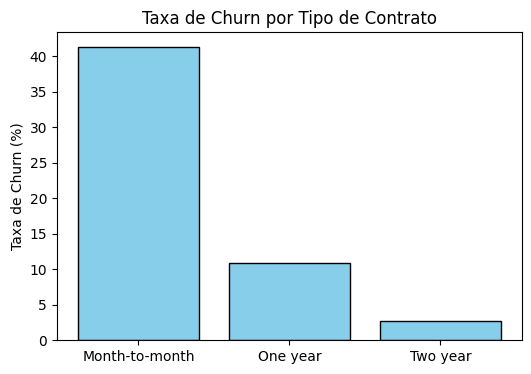

In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.bar(taxa_churn_contrato.index, taxa_churn_contrato.values,
        color='skyblue', edgecolor='black')
plt.xticks([0,1,2], ["Month-to-month", "One year", "Two year"])
plt.ylabel("Taxa de Churn (%)")
plt.title("Taxa de Churn por Tipo de Contrato")
plt.show()

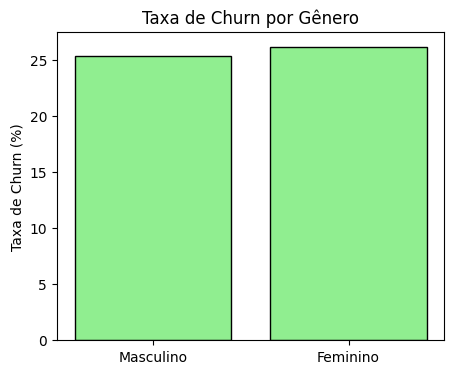

In [92]:
plt.figure(figsize=(5,4))
plt.bar(taxa_churn_genero.index, taxa_churn_genero.values,
        color='lightgreen', edgecolor='black')
plt.xticks([0,1], ["Masculino", "Feminino"])
plt.ylabel("Taxa de Churn (%)")
plt.title("Taxa de Churn por Gênero")
plt.show()

Aprendizado de Machine Learning

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

Teste da máquina

In [83]:

# Definindo X (variáveis preditoras) e y (variável alvo)
X = dados.drop("Saida de Clientes", axis=1)
y = dados["Saida de Clientes"]

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Modelo com ajuste para classes desbalanceadas
log_reg = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predições
y_pred = log_reg.predict(X_test)




Matriz de Confusão

Avaliar como o modelo classifica o aprendizado da máquina.

**944 clientes corretamente previstos como ficaram | 672 clientes corretamente previstos como saíram**

In [82]:
# Avaliação
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Matriz de Confusão:
[[944 672]
 [ 58 503]]


Regressão Logística

O que avaliar: Compreender quais variáveis mais influenciam a chance de evasão.

**O modelo prevê bem tanto os que saem quanto os que ficam. O recall de classe 1 (saíram) = 0.72 (72%) dos clinentes que saem são identificados.**

In [81]:
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.58      0.72      1616
           1       0.43      0.90      0.58       561

    accuracy                           0.66      2177
   macro avg       0.69      0.74      0.65      2177
weighted avg       0.81      0.66      0.68      2177



*Considerações Finais*

* Valor do Contrato é o principal fator de evasão (quanto maior, maior a chance
de churn).

* Tipo de Contrato também pesa bastante (contratos “month-to-month”  puxam a saída).

* Gênero praticamente não impacta e a diferença entre homens e mulheres é fraca estatisticamente.

*Recomendações*
* Clientes com contratos caros e mensais são os mais propensos a sair:  Oferecer descontos, fidelização ou migração para plano anual pode reduzir churn.

* Ajuste de política de preços é essencial, já que o valor do contrato responde por 72% da explicação do modelo.

* O modelo é uma ferramenta preditiva, permitindo que a equipe de retenção monitore clientes com risco de evasão e aja proativamente.